# Vehicle Claim Amount Prediction

In [145]:
### Import Packages ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Normalization

from math import sqrt

pd.set_option('display.max_columns', None) # print all columns
pd.set_option('display.max_colwidth', None)

In [2]:
### Import Data ###
vh = pd.read_csv('D:/SWP/jupyter_workspace/Interview/Aetna/vehicle_insurance.csv')
vh.head(10)

,veh_value,exposure,clm,numclaims,claimamt,veh_body,veh_age,gender,area,agecat
0,1.06,0.303901,0,0,0.0,HBACK,3,F,C,2
1,1.03,0.648871,0,0,0.0,HBACK,2,F,A,4
2,3.26,0.569473,0,0,0.0,UTE,2,F,E,2
3,4.14,0.317591,0,0,0.0,STNWG,2,F,D,2
4,0.72,0.648871,0,0,0.0,HBACK,4,F,C,2
5,2.01,0.854209,0,0,0.0,HDTOP,3,M,C,4
6,1.60,0.854209,0,0,0.0,PANVN,3,M,A,4
7,1.47,0.555784,0,0,0.0,HBACK,2,M,B,6
8,0.52,0.361396,0,0,0.0,HBACK,4,F,A,3
9,0.38,0.520192,0,0,0.0,HBACK,4,F,B,4


In [3]:
# Filter observation with claim amount & drop clm 

print(np.unique(vh[vh['claimamt']>0]['clm']))
print(np.unique(vh[vh['claimamt']==0]['clm']))

vh_claim = vh[vh['clm'] == 1].drop('clm', axis = 1)

print(len(vh_claim.index)) # 4624 rows
vh_claim.head(10)

[1]
[0]
4624


,veh_value,exposure,numclaims,claimamt,veh_body,veh_age,gender,area,agecat
14,1.66,0.484600,1,669.509999,SEDAN,3,M,B,6
16,1.51,0.993840,1,806.609999,SEDAN,3,F,F,4
17,0.76,0.539357,1,401.805451,HBACK,3,M,C,4
40,1.89,0.654346,2,1811.709997,STNWG,3,M,F,2
64,4.06,0.851472,1,5434.439987,STNWG,2,M,F,3
65,1.39,0.317591,1,865.789999,HBACK,3,F,A,4
95,2.66,0.317591,1,1105.769999,STNWG,1,F,F,5
98,0.50,0.071184,1,200.000000,HBACK,4,F,A,5
115,1.16,0.596851,2,739.230000,STNWG,4,F,B,2
124,3.56,0.906229,1,3230.599998,MCARA,3,M,F,4


In [4]:
# Check for null values
vh_claim.isnull().sum()

veh_value    0
exposure     0
numclaims    0
claimamt     0
veh_body     0
veh_age      0
gender       0
area         0
agecat       0
dtype: int64

In [5]:
# create dummy variables for categorical variables
vh_claim = pd.get_dummies(vh_claim)
vh_claim.describe()

,veh_value,exposure,numclaims,claimamt,veh_age,agecat,veh_body_BUS,veh_body_CONVT,veh_body_COUPE,veh_body_HBACK,veh_body_HDTOP,veh_body_MCARA,veh_body_MIBUS,veh_body_PANVN,veh_body_RDSTR,veh_body_SEDAN,veh_body_STNWG,veh_body_TRUCK,veh_body_UTE,gender_F,gender_M,area_A,area_B,area_C,area_D,area_E,area_F
count,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000
mean,1.859196,0.611271,1.067690,2014.404075,2.625649,3.325043,0.001946,0.000649,0.014706,0.273356,0.028114,0.003028,0.009299,0.013408,0.000433,0.319204,0.253676,0.025952,0.056228,0.572664,0.427336,0.234645,0.208694,0.305363,0.107266,0.083478,0.060554
std,1.159595,0.261647,0.271118,3548.906552,1.049190,1.416236,0.044079,0.025466,0.120386,0.445730,0.165317,0.054947,0.095994,0.115028,0.020795,0.466219,0.435162,0.159008,0.230387,0.494745,0.494745,0.423823,0.406419,0.460611,0.309485,0.276633,0.238536
min,0.000000,0.002738,1.000000,200.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.100000,0.410678,1.000000,353.770000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.570000,0.637919,1.000000,761.564999,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.310000,0.832307,1.000000,2091.424997,4.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,13.900000,0.999316,4.000000,55922.129883,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Target & Predictor Split
vh_claim_x = vh_claim.drop('claimamt', axis = 1)
vh_claim_y = vh_claim['claimamt']

# Train & Test Split
x_train, x_test, y_train, y_test = train_test_split(vh_claim_x, vh_claim_y, test_size=0.3, random_state = 0)

## Random Forest

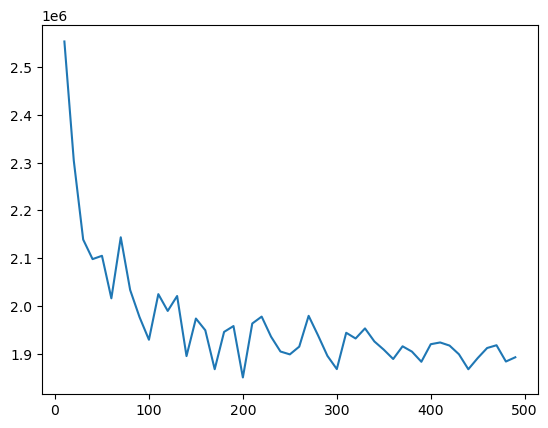

In [9]:
# number of trees => 200

mse = []

for k in range(10, 500, 10):
    rfr = RandomForestRegressor(n_estimators = k)
    rfr.fit(x_train, y_train)
    pred_train = rfr.predict(x_train)
    mse.append(metrics.mean_squared_error(y_train, pred_train))

plt.plot(range(10, 500, 10), mse)

In [11]:
# tune rest of the hyperparameters
grid = GridSearchCV(RandomForestRegressor(n_estimators=300, criterion = 'squared_error', max_features='sqrt', random_state=0),
                    param_grid={'ccp_alpha': np.arange(0, 0.001, 0.0001),
                                'min_impurity_decrease': np.arange(0, 0.001, 0.0001),
                                'min_samples_split': [2, 4, 6]},
                    cv=5, n_jobs=-1)

grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features='sqrt',
                                             n_estimators=300, random_state=0),
             n_jobs=-1,
             param_grid={'ccp_alpha': array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009]),
                         'min_impurity_decrease': array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009]),
                         'min_samples_split': [2, 4, 6]})

In [24]:
# evaluate using the best parameters
rfr = RandomForestRegressor(n_jobs=-1).set_params(**grid.best_params_)
rfr.fit(x_train, y_train)
y_pred_test = rfr.predict(x_test)

# evaluation metrics
print('MAE: {:.1f}'.format(metrics.mean_absolute_error(y_test, y_pred_test)))
print('MSE: {:.1f}'.format(metrics.mean_squared_error(y_test, y_pred_test)))
print('RMSE: {:.1f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))))

MAE: 2063.5
MSE: 11705578.1
RMSE: 3421.3


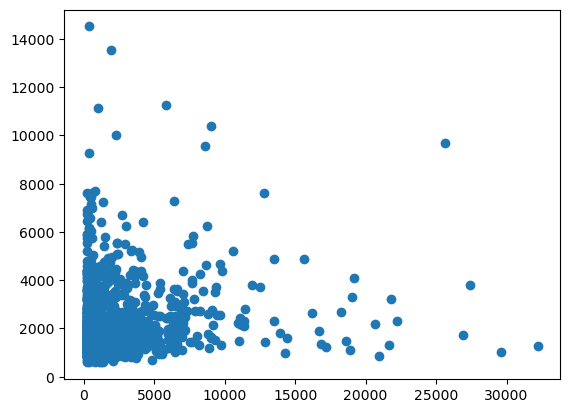

In [13]:
plt.scatter(y_test, y_pred_test)

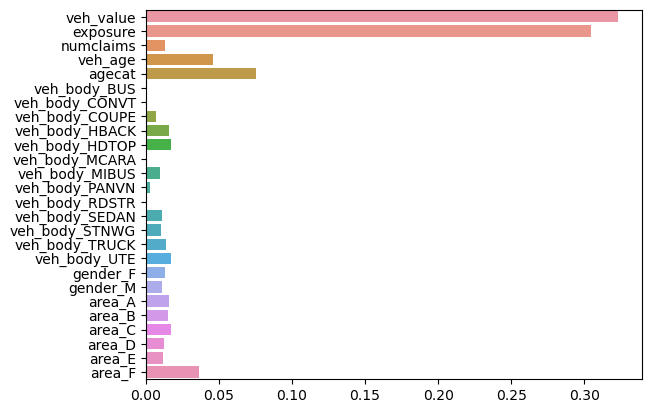

In [14]:
# feature importance
sns.barplot(x=rfr.feature_importances_, y=x_train.columns)
plt.show()

## XGBoost

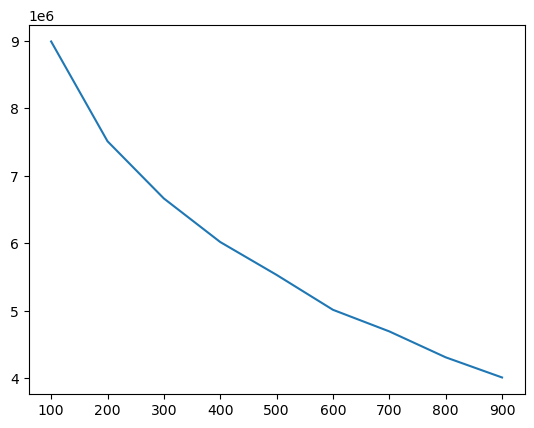

In [25]:
# tune for n_estimators first
mse_gbm = []

for k in range(100, 1000, 100):
    gbr = GradientBoostingRegressor(n_estimators = k)
    gbr.fit(x_train, y_train)
    y_pred_train_gbr = gbr.predict(x_train)
    mse_gbm.append(metrics.mean_squared_error(y_train, y_pred_train_gbr))

plt.plot(range(100, 1000, 100), mse_gbm)

In [94]:
# tune rest of the hyperparameters
grid_gbm = GridSearchCV(GradientBoostingRegressor(loss = 'squared_error',
                                                  max_features='sqrt', 
                                                  random_state=0),
                        param_grid={'n_estimators' : [400, 500, 600, 700, 800],
                                    'subsample' : np.arange(0.25, 1.25, 0.25),
                                    'learning_rate' : np.arange(0.25, 1.25, 0.25),
                                    'max_depth' : np.arange(1, 6, 1)
                                   },
                        cv=5, n_jobs=-1)

grid_gbm.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_features='sqrt',
                                                 random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.25, 0.5 , 0.75, 1.  ]),
                         'max_depth': array([1, 2, 3, 4, 5]),
                         'n_estimators': [400, 500, 600, 700, 800],
                         'subsample': array([0.25, 0.5 , 0.75, 1.  ])})

In [95]:
test = pd.DataFrame(data = [grid_gbm.cv_results_['rank_test_score'],
                            grid_gbm.cv_results_['params'], 
                            grid_gbm.cv_results_['mean_test_score']
                           ]).T

test.columns = ['rank_test_score', 'params', 'mean_test_score']

test = test.sort_values(by = 'rank_test_score', ascending = True)

test.head(10)

,rank_test_score,params,mean_test_score
3,1,"{'learning_rate': 0.25, 'max_depth': 1, 'n_estimators': 400, 'subsample': 1.0}",0.002978
7,2,"{'learning_rate': 0.25, 'max_depth': 1, 'n_estimators': 500, 'subsample': 1.0}",0.001505
11,3,"{'learning_rate': 0.25, 'max_depth': 1, 'n_estimators': 600, 'subsample': 1.0}",-0.000606
15,4,"{'learning_rate': 0.25, 'max_depth': 1, 'n_estimators': 700, 'subsample': 1.0}",-0.000742
19,5,"{'learning_rate': 0.25, 'max_depth': 1, 'n_estimators': 800, 'subsample': 1.0}",-0.001797
103,6,"{'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 400, 'subsample': 1.0}",-0.004012
107,7,"{'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 500, 'subsample': 1.0}",-0.005111
2,8,"{'learning_rate': 0.25, 'max_depth': 1, 'n_estimators': 400, 'subsample': 0.75}",-0.005688
111,9,"{'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 600, 'subsample': 1.0}",-0.007365
6,10,"{'learning_rate': 0.25, 'max_depth': 1, 'n_estimators': 500, 'subsample': 0.75}",-0.009192


In [98]:
# tune rest of the hyperparameters
grid_gbm2 = GridSearchCV(GradientBoostingRegressor(loss = 'squared_error',
                                                  max_features='sqrt', 
                                                  random_state=0),
                        param_grid={'n_estimators' : np.arange(300, 500, 25),
                                    'subsample' : np.arange(0.75, 1.05, 0.05),
                                    'learning_rate' : np.arange(0.05, 0.30, 0.05),
                                    'max_depth' : np.arange(1, 3, 1)
                                   },
                        cv=5, n_jobs=-1)

grid_gbm2.fit(x_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
800 fits failed out of a total of 2800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 317, in _check_params
    raise ValueError("subsample must be in (0,1] but was %r" % self.subsample)
ValueError: subsample must be in (0,1] but was 1.000

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_features='sqrt',
                                                 random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25]),
                         'max_depth': array([1, 2]),
                         'n_estimators': array([300, 325, 350, 375, 400, 425, 450, 475]),
                         'subsample': array([0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05])})

In [99]:
test = pd.DataFrame(data = [grid_gbm2.cv_results_['rank_test_score'],
                            grid_gbm2.cv_results_['params'], 
                            grid_gbm2.cv_results_['mean_test_score']
                           ]).T

test.columns = ['rank_test_score', 'params', 'mean_test_score']

test = test.sort_values(by = 'rank_test_score', ascending = True)

test.head(10)

,rank_test_score,params,mean_test_score
10,1,"{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 325, 'subsample': 0.9000000000000001}",0.023728
3,2,"{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 300, 'subsample': 0.9000000000000001}",0.023251
17,3,"{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 350, 'subsample': 0.9000000000000001}",0.022983
31,4,"{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 400, 'subsample': 0.9000000000000001}",0.022819
11,5,"{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 325, 'subsample': 0.9500000000000002}",0.022763
4,6,"{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 300, 'subsample': 0.9500000000000002}",0.022583
29,7,"{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 400, 'subsample': 0.8}",0.022383
24,8,"{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 375, 'subsample': 0.9000000000000001}",0.022378
30,9,"{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 400, 'subsample': 0.8500000000000001}",0.022256
2,10,"{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 300, 'subsample': 0.8500000000000001}",0.022192


In [100]:
# tune rest of the hyperparameters
grid_gbm3 = GridSearchCV(GradientBoostingRegressor(loss = 'squared_error',
                                                  max_features='sqrt', 
                                                  random_state=0),
                        param_grid={'n_estimators' : np.arange(25, 350, 25),
                                    'subsample' : np.arange(0.80, 0.96, 0.02),
                                    'learning_rate' : np.arange(0.005, 0.05, 0.005),
                                    'max_depth' : np.arange(1, 3, 1)
                                   },
                        cv=5, n_jobs=-1)

grid_gbm3.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_features='sqrt',
                                                 random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045]),
                         'max_depth': array([1, 2]),
                         'n_estimators': array([ 25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325]),
                         'subsample': array([0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 , 0.92, 0.94])})

In [123]:
def grid_top(cv_results, num_results = 10):
    test = pd.DataFrame(data = [cv_results['rank_test_score'],
                                cv_results['params'], 
                                cv_results['mean_test_score']
                               ]).T
    test.columns = ['rank_test_score', 'params', 'mean_test_score']
    test = test.sort_values(by = 'rank_test_score', ascending = True)
    print(test.head(num_results))

In [124]:
grid_top(grid_gbm3.cv_results_)

     rank_test_score  \
1784               1   
1792               2   
616                3   
1206               4   
600                5   
808                6   
608                7   
1014               8   
617                9   
1198              10   

                                                                                                             params  \
1784                                 {'learning_rate': 0.045, 'max_depth': 2, 'n_estimators': 75, 'subsample': 0.8}   
1792                                {'learning_rate': 0.045, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.8}   
616                                 {'learning_rate': 0.015, 'max_depth': 2, 'n_estimators': 325, 'subsample': 0.8}   
1206  {'learning_rate': 0.030000000000000002, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.9200000000000002}   
600                                 {'learning_rate': 0.015, 'max_depth': 2, 'n_estimators': 275, 'subsample': 0.8}   
808                  

In [111]:
# evaluate using the best parameters
gbm = GradientBoostingRegressor().set_params(**grid_gbm3.best_params_)
gbm.fit(x_train, y_train)
y_pred_test_gbm = gbm.predict(x_test)

# evaluation metrics
print('MAE: {:.1f}'.format(metrics.mean_absolute_error(y_test, y_pred_test_gbm)))
print('MSE: {:.1f}'.format(metrics.mean_squared_error(y_test, y_pred_test_gbm)))
print('RMSE: {:.1f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_gbm))))

# MAE: 1901.8
# MSE: 10531372.6
# RMSE: 3245.2

MAE: 1901.8
MSE: 10531372.6
RMSE: 3245.2


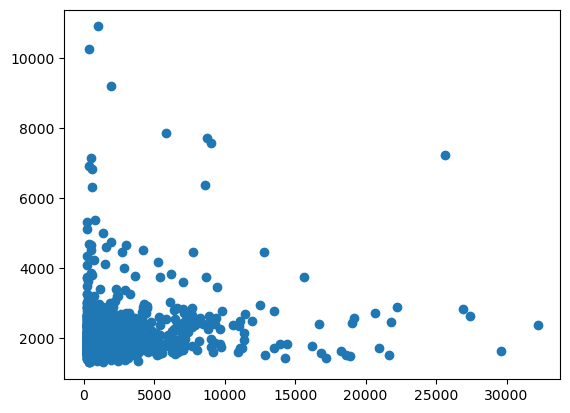

In [112]:
plt.scatter(y_test, y_pred_test_gbm)

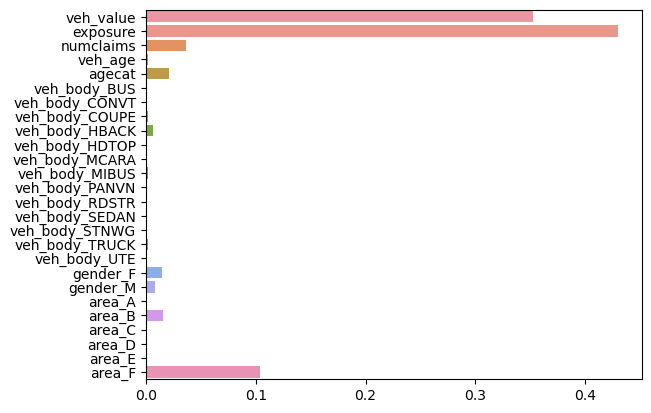

In [113]:
# feature importance
sns.barplot(x=gbm.feature_importances_, y=x_train.columns)
plt.show()

## Neural Network

In [143]:
# # train & test sets
# train_df = pd.concat([y_train, x_train], axis = 1)
# test_df = pd.concat([y_test, x_test], axis = 1)

# define target & predictors
train_features = x_train.copy()
test_features = x_test.copy()
train_labels = y_train.copy()
test_labels = y_test.copy()

In [163]:
# Normalize 
normalizer = Normalization()
normalizer.adapt(train_features)

[[1.87665439e+00 6.10757411e-01 1.06087792e+00 2.60970306e+00
  3.32076645e+00 2.47218763e-03 6.18046906e-04 1.29789887e-02
  2.64833182e-01 2.90482044e-02 3.39925685e-03 9.88875423e-03
  1.14338705e-02 3.09023249e-04 3.24783683e-01 2.53399432e-01
  2.68850457e-02 5.99505529e-02 5.63349843e-01 4.36650187e-01
  2.36093923e-01 2.15080380e-01 2.98516750e-01 1.07540183e-01
  8.28182995e-02 5.99505492e-02]]


In [194]:
# Define model
model = keras.models.Sequential([
      normalizer,
      layers.Dense(64, input_dim = len(train_features.columns),  activation='relu'),
      layers.Dense(64, activation='relu', kernel_regularizer='l1_l2'),
      layers.Dense(1)
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 26)               53        
 ion)                                                            
                                                                 
 dense_17 (Dense)            (None, 64)                1728      
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 6,006
Trainable params: 5,953
Non-trainable params: 53
_________________________________________________________________


In [198]:
# Compile
model.compile(loss='mse', 
              optimizer=tf.keras.optimizers.Adam()
             )

# Train
history=model.fit(train_features, train_labels, epochs = 60, verbose = 1)

Epoch 1/60
102/102 [==============================] - 1s 2ms/step - loss: 12387844.0000
Epoch 2/60
102/102 [==============================] - 0s 2ms/step - loss: 12375687.0000
Epoch 3/60
102/102 [==============================] - 0s 3ms/step - loss: 12377734.0000
Epoch 4/60
102/102 [==============================] - 0s 2ms/step - loss: 12365691.0000
Epoch 5/60
102/102 [==============================] - 0s 2ms/step - loss: 12367487.0000
Epoch 6/60
102/102 [==============================] - 0s 3ms/step - loss: 12364157.0000
Epoch 7/60
102/102 [==============================] - 0s 2ms/step - loss: 12358678.0000
Epoch 8/60
102/102 [==============================] - 0s 3ms/step - loss: 12353727.0000
Epoch 9/60
102/102 [==============================] - 0s 2ms/step - loss: 12351450.0000
Epoch 10/60
102/102 [==============================] - 0s 2ms/step - loss: 12353098.0000
Epoch 11/60
102/102 [==============================] - 0s 2ms/step - loss: 12345896.0000
Epoch 12/60
102/102 [=========

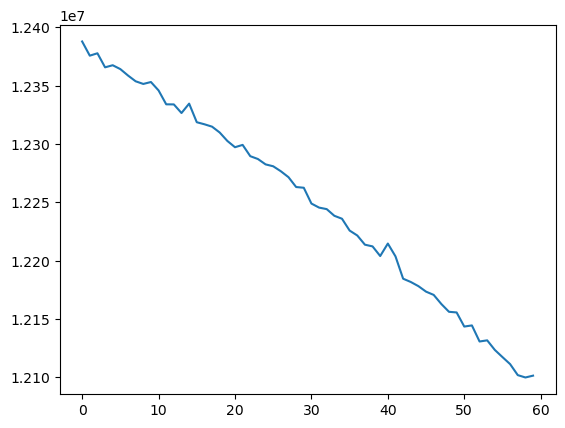

In [199]:
# mse over iterations
plt.plot(history.history['loss'], label='train mse')

In [200]:
# test set
test_results = model.evaluate(test_features, test_labels, verbose=0)
test_predictions = model.predict(test_features).flatten()

44/44 [==============================] - 0s 2ms/step


In [201]:
print('Mean Absolute Error: {:.1f}'.format(metrics.mean_absolute_error(test_labels, test_predictions)))  
print('Mean Squared Error: {:.1f}'.format(metrics.mean_squared_error(test_labels, test_predictions)))  
print('Root Mean Squared Error: {:.1f}'.format(np.sqrt(metrics.mean_squared_error(test_labels, test_predictions))))
# Mean Absolute Error: 1970.0
# Mean Squared Error: 10867469.9
# Root Mean Squared Error: 3296.6

Mean Absolute Error: 1970.0
Mean Squared Error: 10867469.9
Root Mean Squared Error: 3296.6
